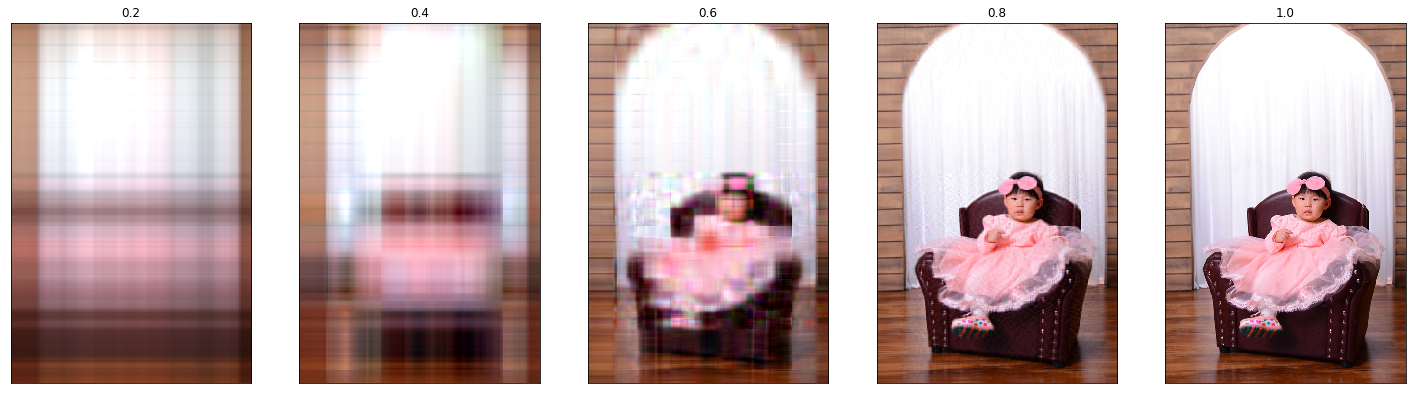

In [103]:
from PIL import Image
import numpy as np

def rebuild_img(u, sigma, v, p): #p表示奇异值的百分比
#     print(p)
    m = len(u)
    n = len(v)
    a = np.zeros((m, n))

    count = (int)(sum(sigma))
    curSum = 0
    k = 0
    while curSum <= count * p:
        uk = u[:, k].reshape(m, 1)
        vk = v[k].reshape(1, n)
        a += sigma[k] * np.dot(uk, vk)
        curSum += sigma[k]
        k += 1
    a[a < 0] = 0
    a[a > 255] = 255
    #按照最近距离取整数，并设置参数类型为uint8
    return np.rint(a).astype("uint8")

def show_pic(img_proc, img_title):
    N = len(img_proc)
    plt.figure(figsize=(N*5,10), dpi=72, facecolor="white")
    for i in range(N):
        ax = plt.subplot(1, N, i + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(img_proc[i])
        ax.set_title(img_title[i])
    plt.show()

if __name__ == '__main__':
    img = Image.open('test2.jpg', 'r')
    a = np.array(img)
    img_proc = []
    img_title = []
    for p in np.arange(0.2, 1.01, 0.2):
        u, sigma, v = np.linalg.svd(a[:, :, 0])
        R = rebuild_img(u, sigma, v, p)

        u, sigma, v = np.linalg.svd(a[:, :, 1])
        G = rebuild_img(u, sigma, v, p)

        u, sigma, v = np.linalg.svd(a[:, :, 2])
        B = rebuild_img(u, sigma, v, p)
        
        I = np.stack((R, G, B), 2)
        img_proc.append(I)
        img_title.append(p)
    
    show_pic(img_proc, img_title)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from load_MNIST import *


def pca(data, k=0.5):
    data_mean = data - np.mean(data, axis=0)
    data_cov = np.cov(data_mean,rowvar=0)
    data_vals, data_vects = np.linalg.eig(data_cov)
    topN = 0
    curSum = 0
    totalSum = (int)(sum(data_vals))
    while curSum <= totalSum * k:
        curSum += data_vals[topN]
        topN += 1
    data_index = np.argsort(data_vals)[:-(topN + 1):-1]
    data_vects = data_vects[:, data_index]
    data_recon = data_mean.dot(data_vects).dot(data_vects.T) + np.mean(data, axis=0)
    return data_recon

def show_pic(sample,recon_sample):
    N = sample.shape[0]
    plt.figure(figsize=(4,N*2), dpi=72, facecolor="white")
    for i in range(N):
        ax = plt.subplot(N, 2, 2*i + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(sample[i,:].reshape(28,28), cmap="gray")
        ax2 = plt.subplot(N, 2, 2*i + 2)
        ax2.set_xticks([])
        ax2.set_yticks([])
        ax2.imshow(recon_sample[i,:].reshape(28,28).astype("float"), cmap="gray")
    plt.show()

trainX,trainy,testX,testy=get_data(Only0=False,N=3000)
data=testX[:,1:]
recon_data = pca(data,0.8)
show_pic(data[:5], recon_data)

C:\Users\LoveP\Desktop\Git\Python\Numpy\load_MNIST.py:23: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  images = images.reshape(numImages, numCols, numRows)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


In [15]:
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = Image.open('lena.png', 'r')
a = np.array(img)
print(a.shape)
lena = mpimg.imread('lena.png')
print(lena.shape)
plt.imshow(a[:,:,2])
plt.show()
im = Image.fromarray(np.rint(lena*255).astype("uint8"))
# im.show()

(300, 300, 4)
(300, 300, 4)


C:\Users\LoveP\Desktop\Git\Python\Numpy\load_MNIST.py:23: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  images = images.reshape(numImages, numCols, numRows)


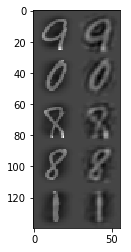

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from load_MNIST import *


def pca(dataMat, k=0.9):
    covMat = np.cov(dataMat, rowvar=0)   #求协方差方阵
    u,s,v = np.linalg.svd(covMat)

    for i in range(len(s)-1):
        if sum(s[:i+1])/sum(s) > k:
            break
    u_s = u[:,:i+1] 
    lowd_sample = u_s.T.dot(dataMat.T)
    recon_sample = u_s.dot(lowd_sample)              
    return recon_sample.T

def show_pic(sample,recon_sample):
    N = sample.shape[0]
    a=np.zeros((28*N,28*2))
    for i in range(N):
        a[28*i:28*(i+1),:28]=sample[i,:].reshape(28,28)
        a[28*i:28*(i+1),28:]=recon_sample[i,:].reshape(28,28)
    plt.imshow(a, cmap="gray")
    plt.show()


trainX,trainy,testX,testy=get_data(Only0=False,N=3000)
data=testX[:,1:]
recon_data = pca(data,0.8)
show_pic(data[:5], recon_data)

C:\Users\LoveP\Desktop\Git\Python\Numpy\load_MNIST.py:23: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  images = images.reshape(numImages, numCols, numRows)


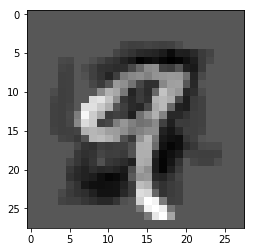

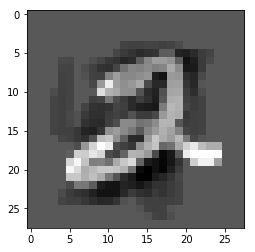

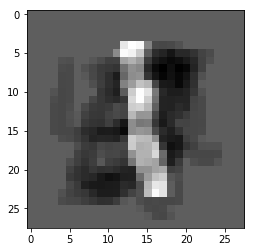

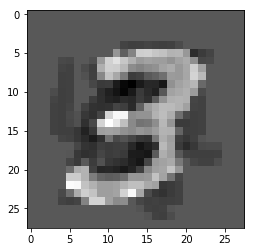

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from load_MNIST import *

trainX,trainy,testX,testy=get_data(Only0=False,N=4)
data=testX[:,1:]
for i in range(4):
    plt.imshow(data[i].reshape((28, 28)), cmap="gray")
    plt.show()

In [10]:
# coding:utf-8
import numpy as np
from load_MNIST import *
# 用full-connected神经网络搞的LeCun的手写数字识别

# 784*30*10

speed = 1

def sigmoid(z):
    """The sigmoid function."""
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z) * (1.0 - sigmoid(z))

W = []
W1 = np.random.randn(30, 784)
W2 = np.random.randn(10, 30)
W.append(W1)
W.append(W2)

b = []
b1 = np.random.randn(30,1)
b2 = np.random.randn(10,1)
b.append(b1)
b.append(b2)

training_data, validation_data, test_data, test_val=get_data(Only0=False,N=1000)

for i in range(0, 1000):
    zs = []
    activations = []
    activations.append(training_data[i][0])
    z0 = np.dot(W[0], training_data[i][0]) + b[0]
    zs.append(z0)
    a1 = sigmoid(z0)
    activations.append(a1)
    z1 = np.dot(W[1], a1) + b[1]
    zs.append(z1)
    a2 = sigmoid(z1)
    activations.append(a2)

    error = []

    error0 = activations[2] - training_data[i][1]
    error0 = error0 * sigmoid_prime(zs[1])
    error.append(error0)

    error1 = np.dot(W[1].transpose(),error[0])
    error1 = error1 * sigmoid_prime(zs[0])
    error.append(error1)

    print(i)

    dw0 = np.dot(error[1], activations[0].transpose())

    dw1 = np.dot(error[0], activations[1].transpose())


    W[0] = W[0] - dw0    
    b[0] = error[1] - b[0]
    W[1] = W[1] - dw1
    b[1] = error[0] - b[1]

count = 0
for i in range(100):
    a = test_data[i][0]
    for bb, ww in zip(b, W):
        a = sigmoid(np.dot(ww, a) + bb)    
    print(a)
    print(test_data[i][1])
    if np.argmax(a) == test_data[i][1]:
        count = count + 1
print(count)

C:\Users\LoveP\Desktop\Git\Python\Numpy\load_MNIST.py:23: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  images = images.reshape(numImages, numCols, numRows)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: overflow encountered in exp


61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320